Starting training of RNN model...

RNN Epoch 1/3
  Validation Accuracy: 0.7764

RNN Epoch 2/3
  Validation Accuracy: 0.8079

RNN Epoch 3/3
  Validation Accuracy: 0.8151

RNN Final Test Accuracy: 0.8151


Starting training of LSTM model...

LSTM Epoch 1/3
  Validation Accuracy: 0.8616

LSTM Epoch 2/3
  Validation Accuracy: 0.8520

LSTM Epoch 3/3
  Validation Accuracy: 0.8555

LSTM Final Test Accuracy: 0.8555



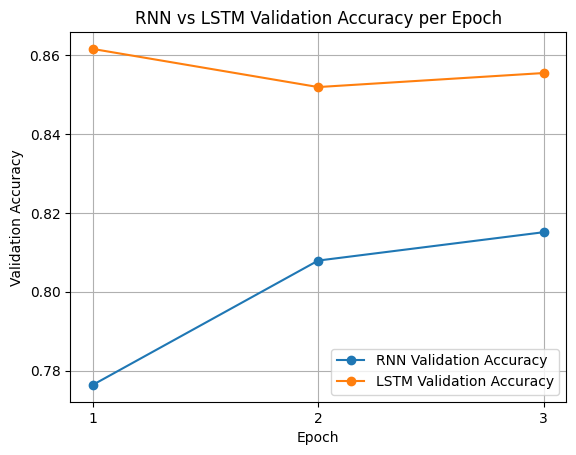

Sample predictions on test data:

Review 1: <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> please give this one a miss br br <UNK> <UNK> and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how mich

C:\Users\Asus\AppData\Local\Temp\ipykernel_25424\3447473621.py:64: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"RNN prediction: {int(rnn_model.predict(x[None])[0]>0.5)}")
C:\Users\Asus\AppData\Local\Temp\ipykernel_25424\3447473621.py:65: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"LSTM prediction: {int(lstm_model.predict(x[None])[0]>0.5)}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
RNN prediction: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
LSTM prediction: 1

Review 3: everyone's horror the <UNK> promptly eats the mayor and then goes on a merry rampage <UNK> citizens at random a title card <UNK> reads news of the king's <UNK> throughout the kingdom when the now terrified <UNK> once more <UNK> <UNK> for help he loses his temper and <UNK> their community with lightning <UNK> the moral of our story delivered by a hapless frog just before he is eaten is let well enough alone br br considering the time period when this startling little film was made and considering the fact that it was made by a russian <UNK> at the height of that <UNK> country's civil war it would be easy to see this as a <UNK> about those events <UNK> may or may not have had <UNK> turmoil in mind when he made <UNK> but whatever <UNK> his choice of material the film stands as a <UNK> tale of universal <UNK> <UNK> could be the soviet union italy germany or japan in t

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=200)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=200)

def build_model(cell):
    return tf.keras.Sequential([
        tf.keras.layers.Embedding(10000, 128),
        cell(64),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

print("Starting training of RNN model...\n")
rnn_model = build_model(tf.keras.layers.SimpleRNN)
rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn_val_acc = []
for epoch in range(3):
    print(f"RNN Epoch {epoch+1}/3")
    history = rnn_model.fit(x_train, y_train, epochs=1, batch_size=64, validation_data=(x_test, y_test), verbose=0)
    val_acc = history.history['val_accuracy'][0]
    rnn_val_acc.append(val_acc)
    print(f"  Validation Accuracy: {val_acc:.4f}\n")

rnn_loss, rnn_acc = rnn_model.evaluate(x_test, y_test, verbose=0)
print(f"RNN Final Test Accuracy: {rnn_acc:.4f}\n\n")

print("Starting training of LSTM model...\n")
lstm_model = build_model(tf.keras.layers.LSTM)
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_val_acc = []
for epoch in range(3):
    print(f"LSTM Epoch {epoch+1}/3")
    history = lstm_model.fit(x_train, y_train, epochs=1, batch_size=64, validation_data=(x_test, y_test), verbose=0)
    val_acc = history.history['val_accuracy'][0]
    lstm_val_acc.append(val_acc)
    print(f"  Validation Accuracy: {val_acc:.4f}\n")

lstm_loss, lstm_acc = lstm_model.evaluate(x_test, y_test, verbose=0)
print(f"LSTM Final Test Accuracy: {lstm_acc:.4f}\n")

plt.plot(range(1,4), rnn_val_acc, marker='o', label='RNN Validation Accuracy')
plt.plot(range(1,4), lstm_val_acc, marker='o', label='LSTM Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('RNN vs LSTM Validation Accuracy per Epoch')
plt.xticks(range(1,4))
plt.legend()
plt.grid(True)
plt.show()

word_index = tf.keras.datasets.imdb.get_word_index()
index_word = {v+3:k for k,v in word_index.items()}
index_word[0], index_word[1], index_word[2], index_word[3] = "<PAD>", "<START>", "<UNK>", "<UNUSED>"

def decode(x): return ' '.join(index_word.get(i, '?') for i in x)

print("Sample predictions on test data:\n")
for i in range(3):
    x = x_test[i]
    print(f"Review {i+1}: {decode(x)}")
    print(f"True label: {y_test[i]}")
    print(f"RNN prediction: {int(rnn_model.predict(x[None])[0]>0.5)}")
    print(f"LSTM prediction: {int(lstm_model.predict(x[None])[0]>0.5)}\n")
